In [1]:
import os
import sonia
from sonnia.sonia import Sonia
from sonnia.sonia_paired import SoniaPaired
from sonia.plotting import Plotter
import sonia
import numpy as np
import pandas as pd

# define and infer model

In [2]:
data_seqs=np.loadtxt('data_seqs_paired.txt',dtype=str)
print(data_seqs[:5])
qm = SoniaPaired(data_seqs=data_seqs,ppost_model='humanTCR')

[['CASSEGGGSSYEQYF' 'TRBV7-2' 'TRBJ2-7' 'CAMRGPFNKFYF' 'TRAV14/DV4'
  'TRAJ21']
 ['CASRGSGGEIGYTF' 'TRBV5-8' 'TRBJ1-2' 'CAMSVKGAGQNFVF' 'TRAV12-3'
  'TRAJ26']
 ['CASSQAWALTYEQYF' 'TRBV4-1' 'TRBJ2-7' 'CLEHLTGGFKTIF' 'TRAV4' 'TRAJ9']
 ['CASSPRTGTVGNTIYF' 'TRBV2' 'TRBJ1-3' 'CAAQGSSNTGKLIF' 'TRAV13-1'
  'TRAJ37']
 ['CASRTGGGGYTF' 'TRBV28' 'TRBJ1-2' 'CAGFKTIF' 'TRAV13-2' 'TRAJ9']]


2025-11-17 13:03:45,011: Adding data seqs.
2025-11-17 13:03:45,045: Using default index (0) for amino acid CDR3 sequences.
2025-11-17 13:03:45,045: Using default index (1) for V genes.
2025-11-17 13:03:45,051: Using default index (2) for J genes.
2025-11-17 13:03:45,103: 100000 sequences before filtering. Using /home/ubuntu/soNNia/sonnia/default_models/human_T_beta_alpha/heavy_chain for filtering.
2025-11-17 13:03:45,286: 100000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-11-17 13:03:45,294: 100000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-11-17 13:03:45,330: 100000 sequences remain after removing data which are unproductive amino acid sequences.
2025-11-17 13:03:45,404: 100000 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025-1

In [3]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(2e5)) 

2025-11-17 13:03:51,284: Generating 200000 using the light pgen model in /home/ubuntu/soNNia/sonnia/default_models/human_T_beta_alpha/light_chain and the heavy pgen model in /home/ubuntu/soNNia/sonnia/default_models/human_T_beta_alpha/heavy_chain.
2025-11-17 13:03:55,400: Adding gen seqs.
2025-11-17 13:03:55,496: Using default index (0) for amino acid CDR3 sequences.
2025-11-17 13:03:55,497: Using default index (1) for V genes.
2025-11-17 13:03:55,512: Using default index (2) for J genes.
2025-11-17 13:03:55,615: 200000 sequences before filtering. Using /home/ubuntu/soNNia/sonnia/default_models/human_T_beta_alpha/heavy_chain for filtering.
2025-11-17 13:03:56,010: 200000 sequences remain after removing sequences with V genes inconsistent with the model.
2025-11-17 13:03:56,028: 200000 sequences remain after removing sequences with J genes inconsistent with the model.
2025-11-17 13:03:56,099: 200000 sequences remain after removing data which are unproductive amino acid sequences.
2025-1

In [4]:
#define and train model
qm.infer_selection(epochs=30,batch_size=int(1e4))

2025-11-17 13:05:31,661: Finished training.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]
2025-11-17 13:05:33,539: Updating marginals.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]
2025-11-17 13:05:35,530: Finished updating marginals.


# Do some plotting

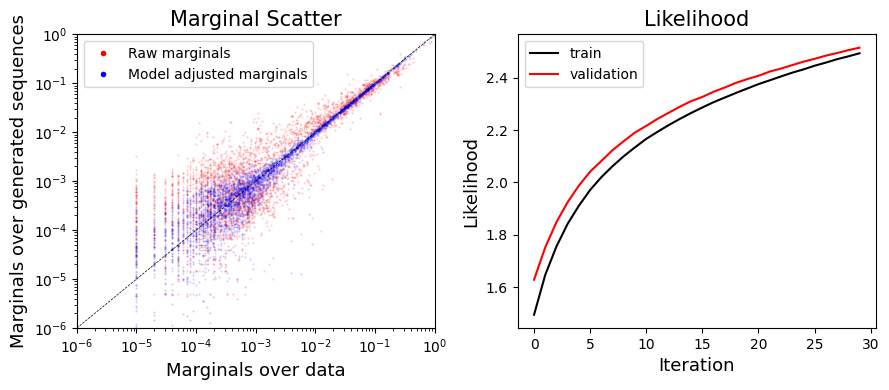

In [9]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

# Generate sequences

In [10]:
pre_seqs=qm.generate_sequences_pre(int(1e5),nucleotide=False)
pre_seqs[:3]

array([['CASPRQPQPQHF', 'TRBV14', 'TRBJ1-5', 'CAGAVTNAGKSTF', 'TRAV27',
        'TRAJ27'],
       ['CSASHDHILYEKLFF', 'TRBV20-1', 'TRBJ1-4', 'CAAGVMDSSYKLIF',
        'TRAV13-1', 'TRAJ12'],
       ['CASSWDYQGILNYEQYF', 'TRBV5-4', 'TRBJ2-7', 'CGTNAGKSTF',
        'TRAV27', 'TRAJ27']], dtype='<U93')

In [7]:
post_seqs=qm.generate_sequences_post(int(1e5),nucleotide=False)
post_seqs[:5]

Computing energies: 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]


array([['CASSPPPDTQYF', 'TRBV7-2', 'TRBJ2-3', 'CADSRGSQGNLIF', 'TRAV41',
        'TRAJ42'],
       ['CATSSGNTIYF', 'TRBV15', 'TRBJ1-3', 'CAANRGGKLIF', 'TRAV13-1',
        'TRAJ23'],
       ['CASSPWPGQGHTIYF', 'TRBV2', 'TRBJ1-3', 'CAVRPGNTPLVF',
        'TRAV12-2', 'TRAJ29'],
       ['CASSLGQFNTEAFF', 'TRBV11-3', 'TRBJ1-1', 'CAATKGGGNKLTF',
        'TRAV13-1', 'TRAJ10'],
       ['CASSLRPGQAFF', 'TRBV5-1', 'TRBJ1-1', 'CLLGDGGGSNYKLTF',
        'TRAV40', 'TRAJ53']], dtype='<U93')

# Evaluate sequences

In [8]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e5)].values)
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

Encoding sequence features:   3%|▎         | 3242/99986 [00:00<00:02, 32416.48it/s]

Computing energies: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


[0.5769772 3.9851768 3.6605735]
[1.26058019e-15 2.72032238e-15 3.89377588e-19]
[7.27326022e-16 1.08409657e-14 1.42534527e-18]


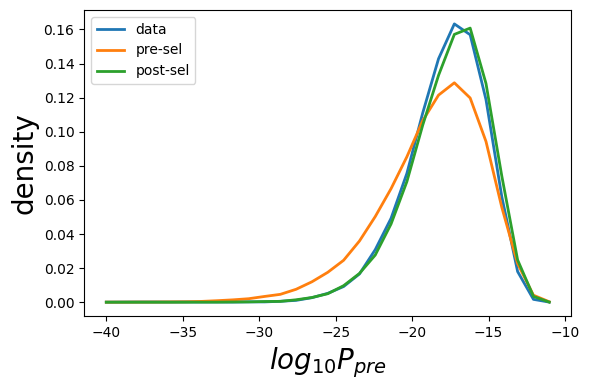

In [11]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}',bin_min=-40,bin_max=-10)

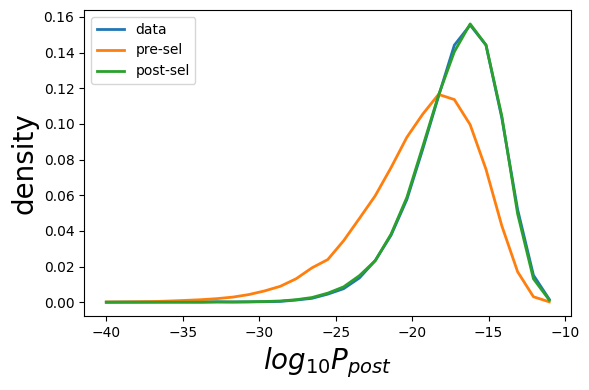

In [12]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}',bin_min=-40,bin_max=-10)

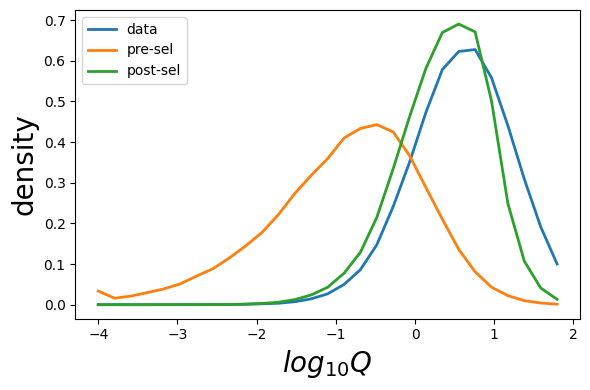

In [15]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils inherited from OLGA

In [16]:
# olga functionality can be directly accessed throu2gh the main SoNNia model

In [17]:
qm.seqgen_model_light.gen_rnd_prod_CDR3(),qm.seqgen_model_heavy.gen_rnd_prod_CDR3()

(('TGCATCTCCCGGCCCCTCACCTTT', 'CISRPLTF', 43, 2),
 ('TGTGCCAGCAGCCATGTACCAACGGACGCTTATAGCAATCAGCCCCAGCATTTT',
  'CASSHVPTDAYSNQPQHF',
  46,
  4))

In [18]:
qm.genomic_data_light.genJ[1],qm.genomic_data_heavy.genJ[1]

(['TRAJ10*01',
  'ATACTCACGGGAGGAGGAAACAAACTCACCTTT',
  'ATACTCACGGGAGGAGGAAACAAACTCACCTTTGGGACAGGCACTCAGCTAAAAGTGGAACTCA'],
 ['TRBJ1-2*01',
  'CTAACTATGGCTACACCTTC',
  'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG'])

In [19]:
qm.pgen_model_heavy.PinsDJ,qm.pgen_model_light.PinsVJ

(array([7.19554e-02, 5.63345e-02, 8.55143e-02, 1.27028e-01, 1.21860e-01,
        1.08232e-01, 8.59492e-02, 7.45618e-02, 5.07897e-02, 3.88103e-02,
        3.57069e-02, 2.68135e-02, 2.15603e-02, 1.95199e-02, 1.66126e-02,
        1.44175e-02, 1.02015e-02, 9.54077e-03, 7.30822e-03, 5.44689e-03,
        4.32498e-03, 2.46807e-03, 1.75657e-03, 9.34188e-04, 5.72187e-04,
        7.20642e-04, 4.44661e-04, 1.06769e-04, 7.10554e-05, 3.08047e-04,
        1.29150e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([2.80720e-02, 3.70881e-02, 7.18272e-02, 1.11361e-01, 1.45677e-01,
        1.17451e-01, 9.39653e-02, 8.25969e-02, 7.71960e-02, 5.37416e-02,
        4.99160e-02, 3.79668e-02, 2.58719e-02, 1.95766e-02, 1.36449e-02,
        8.74302e-03, 5.57685e-03, 3.94724e-03, 2.88705e-03, 1.72847e-03,
        1.77234e-03, 1.44091e-03, 1.39968e-03, 1.40263e-03, 1.25466e-03,
        6.01223e-04, 1.11938e-03, 7.01411e-04, 3.20548e-04, 2.40517e-04,
        3.74385e-05, 8.82230e-05, 8.38335e-05, 1.

# Save and Load Model

In [20]:
qm.save_model('test_paired')

In [21]:
qm_new=SoniaPaired(ppost_model='test_paired')

In [22]:
# By default sequences are not added. Adding them now.
qm_new.update_model(add_data_seqs=qm.data_seqs,add_gen_seqs=qm.gen_seqs)

2025-11-17 13:11:05,081: Adding data seqs.
2025-11-17 13:11:05,144: Using default index (0) for amino acid CDR3 sequences.
2025-11-17 13:11:05,145: Using default index (1) for V genes.
2025-11-17 13:11:05,151: Using default index (2) for J genes.
2025-11-17 13:11:05,205: 99986 sequences before filtering. Using test_paired/heavy_chain for filtering.
2025-11-17 13:11:05,391: 99986 sequences remain after removing sequences with V genes inconsistent with the model.
2025-11-17 13:11:05,399: 99986 sequences remain after removing sequences with J genes inconsistent with the model.
2025-11-17 13:11:05,436: 99986 sequences remain after removing data which are unproductive amino acid sequences.
2025-11-17 13:11:05,508: 99986 sequences remain after removing sequences that do not begin with a 'C' or end in a ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'].
2025-11-17 13:11:05,540: 99986 sequences remain after removi

In [23]:
# Continue inference
qm_new.infer_selection(epochs=5)
qm_new.learning_history.history

2025-11-17 13:11:35,447: Finished training.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]
2025-11-17 13:11:37,360: Updating marginals.
Computing energies: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]
2025-11-17 13:11:39,346: Finished updating marginals.


{'_likelihood': [-1.7416709661483765,
  -1.7556878328323364,
  -1.7678178548812866,
  -1.7807191610336304,
  -1.7920759916305542],
 'binary_crossentropy': [0.3523142635822296,
  0.3505375385284424,
  0.34897327423095703,
  0.3475055992603302,
  0.3461282253265381],
 'loss': [0.3523143529891968,
  0.3505374491214752,
  0.3489736020565033,
  0.34750598669052124,
  0.3461282551288605],
 'val__likelihood': [-1.761418342590332,
  -1.7723807096481323,
  -1.7818650007247925,
  -1.7898236513137817,
  -1.7986449003219604],
 'val_binary_crossentropy': [0.3517608642578125,
  0.35050806403160095,
  0.34941861033439636,
  0.34838756918907166,
  0.34734925627708435],
 'val_loss': [0.3517608344554901,
  0.35050803422927856,
  0.349418580532074,
  0.3483875095844269,
  0.34734922647476196]}

# Compute Diversity and Distance from Reference Distribution

In [24]:
print('model entropy is: ', qm_new.entropy(), '[bits]')

Computing energies:   0%|          | 0/1 [00:00<?, ?it/s]

Computing energies: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]
2025-11-17 13:12:18,373: 2 sequences have zero Pgen, we remove them in the evaluation of the entropy


model entropy is:  56.75602773959275 [bits]


In [25]:
print('Dkl post gen is: ', qm_new.dkl_post_gen(), '[bits]')

Dkl post gen is:  2.0906377 [bits]


# Load default model

In [27]:
default_model=SoniaPaired(ppost_model='humanTCR')